In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.0.0-alpha0


In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

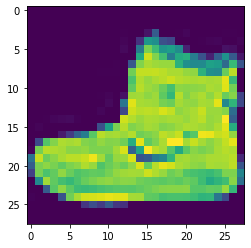

In [9]:
plt.imshow(train_images[0])

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4864 - accuracy: 0.8245 - val_loss: 0.4590 - val_accuracy: 0.8335
Epoch 2/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3672 - accuracy: 0.8636 - val_loss: 0.4221 - val_accuracy: 0.8442
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3354 - accuracy: 0.8759 - val_loss: 0.3738 - val_accuracy: 0.8599
Epoch 4/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3073 - accuracy: 0.8860 - val_loss: 0.3675 - val_accuracy: 0.8686
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2906 - accuracy: 0.8915 - val_loss: 0.3438 - val_accuracy: 0.8763
Epoch 6/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2775 - accuracy: 0.8959 - val_loss: 0.3541 - val_accuracy: 0.8751
Epoch 7/20
60000/60000 [==============================] 

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3980 - accuracy: 0.8883


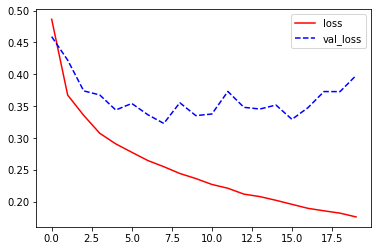

In [29]:
plt.plot(history.epoch, history.history['loss'], 'r', label='loss')
plt.plot(history.epoch, history.history['val_loss'], 'b--', label='val_loss')
plt.legend()

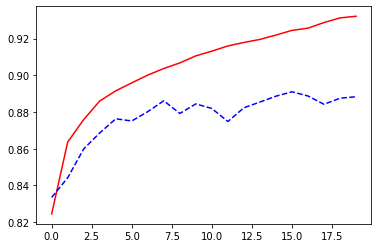

In [32]:
plt.plot(history.epoch, history.history['accuracy'], 'r')
plt.plot(history.epoch, history.history['val_accuracy'], 'b--')